# Generating Basic Networks

OpenPNM includes a variety of network generators. This notebook cover the use of just a few simple ones which is a good primer for for the rest of this tutorial series.

In [1]:
import openpnm as op
import numpy as np

## Cubic

The standard cubic network is the basic starting point for pore network modeling.  They are simple but still quite useful since all the key behaviors seen in a porous material are present in cubic network, such as shielding, percolation, and so on.

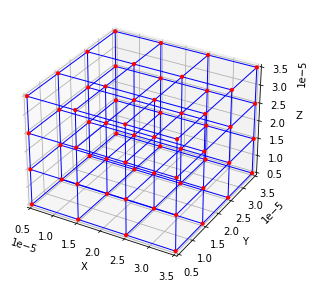

In [2]:
pn = op.network.Cubic(shape=[4, 4, 4], spacing=1e-5)
ax = op.topotools.plot_connections(pn)
ax = op.topotools.plot_coordinates(pn, ax=ax)

> **ProTip! Quick Visualization in the IDE**
>
>The above block uses the ``plot_connections`` and ``plot_coordinates`` method from the ``topotools`` module.  The options for visualization are explored in depth later in this tutorial series.

The shape and spacing of the network can both be altered:

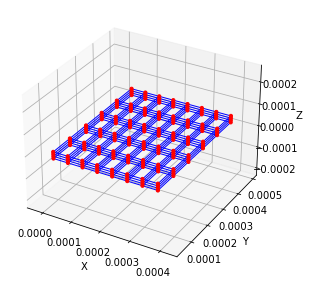

In [3]:
pn = op.network.Cubic(shape=[8, 6, 4], spacing=[5e-5, 9e-5, 1e-5])
ax = op.topotools.plot_connections(pn)
ax = op.topotools.plot_coordinates(pn, ax=ax)

It is also possible to add more than just the standard 6 connections:

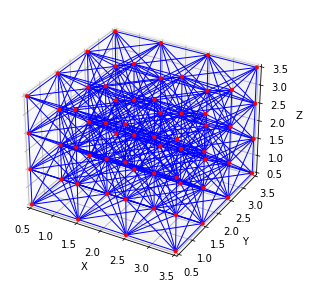

In [4]:
pn = op.network.Cubic(shape=[4, 4, 4], connectivity=26)
ax = op.topotools.plot_connections(pn)
ax = op.topotools.plot_coordinates(pn, ax=ax)

One of the uses of a 26-connected network is the removal of throats at random to create a more natural topology.  There is a more detailed description of how to manipulate networks in a following tutorial, but here we'll introduce the ``topotools`` module, which contains the ``trim`` function which allows us to delete some throats or pores:

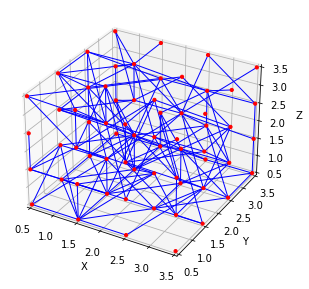

In [5]:
pn = op.network.Cubic(shape=[4, 4, 4], connectivity=26)
np.random.seed(0)
drop = np.random.randint(0, pn.Nt, 500)
op.topotools.trim(network=pn, throats=drop)
ax = op.topotools.plot_connections(pn)
ax = op.topotools.plot_coordinates(pn, ax=ax)

## Bravais Lattices

Another useful and related network is the `Bravias` class, which allows `'fcc'` and `'bcc'` lattices (``'hcp'`` is not yet supported). These are very helpful for creating higher porosity networks since it jams extra pores into the interstial spaces:

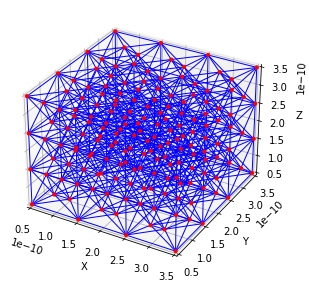

In [6]:
pn = op.network.Bravais(shape=[4, 4, 4], spacing=1e-5, mode='fcc')
ax = op.topotools.plot_connections(pn)
ax = op.topotools.plot_coordinates(pn, ax=ax)

Note that the 4x4x4 spacing refers to the number of corner sites, so it's basically the same size and shape as would be obtained using ``Cubic``, but it has the extra nodes placed between the corner sites.

## Random 

OpenPNM can also handle random network with ease since the topology is stored in a totally general way, to be discussed in a later tutorial. Below is the Voronoi tessellation of a set of random base points:

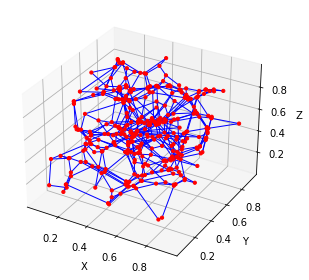

In [7]:
pn = op.network.Voronoi(shape=[1, 1, 1], points=100)
ax = op.topotools.plot_connections(pn)
ax = op.topotools.plot_coordinates(pn, ax=ax)

In all the above cases, the network generator returns a ``Network`` object, which is a Python `dict` containing Numpy `ndarrays`.  The contents of this dictionary can be seen by "printing" the object:

In [8]:
print(pn)


══════════════════════════════════════════════════════════════════════════════
net : <openpnm.network.Voronoi at 0x22b344b3130>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  1  pore.coords                                                     364 / 364
  2  throat.conns                                                    652 / 652
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Labels                                                 Assigned Locations
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


The next chapter in this tutorial series will dive into the details of the data storage, but for now it is worth pointing out that all networks have `'pore.coords'`, which is an *Np-by-3* array of [x, y, z] coordinates of each pore center, and `'throat.conns'` is an *Nt-by-2* array of which pore lies on either end of each throat.

## Imported Networks

Just as OpenPNM can handle random Voronoi networks, it can handle network extracted from images as well. This will be covered in a later tutorial, but the basic idea is that OpenPNM needs to know the [x, y, z] coordinates of each pore, and which pores are connected to which.  Let's generate our own simple network just for fun:

In [13]:
coords = [[0, 0, 0],  # coordinates for pore 0
          [1, 0, 0],  # coordinates for pore 1
          [1, 1, 0],  # coordinates for pore 2
          [0, 1, 0]]  # coordinates for pore 3
conns = [[0, 1],  # throat 0 connects pores 0 and 1
         [1, 2],  # throat 1 connects pores 1 and 2
         [2, 3],  # throat 2 connects pores 2 and 3
         [0, 3]]  # throat 3 connects pores 0 and 3
Dpore = [1,  # diameter for pore 0
         2,  # diameter for pore 1
         1,  # diameter for pore 2
         3,]  # diameter for pore 3
Dthroat = [0.5,  # diameter for throat 0
           0.2,  # diameter for throat 1
           0.8,  # diameter for throat 2
           0.7]  # diameter for throat 3

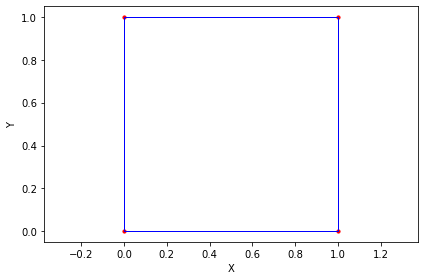

In [12]:
pn = op.network.Network(coords=coords, conns=conns)
ax = op.topotools.plot_connections(pn)
ax = op.topotools.plot_coordinates(pn, ax=ax)

Now let's add the pore and throat diameter values. Note the naming convention of preceding the keys with `'pore.'` or `'throat.'`. This will be discussed in more depth in the next tutorial.

In [24]:
pn['pore.diameter'] = Dpore
pn['throat.diameter'] = Dthroat

Now we can use the pore and throat sizes to augment our plotting a little bit: 

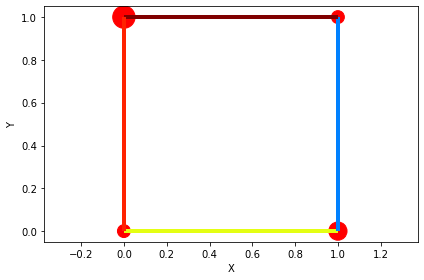

In [25]:
ax = op.topotools.plot_connections(pn, color_by=pn['throat.diameter'], linewidth=4)
ax = op.topotools.plot_coordinates(pn, size_by=pn['pore.diameter'], markersize=500, ax=ax)

For extracted networks it is not normal practice to enter all the values by hand as done above. OpenPNM has an ``io`` module which contains functions for reading from a wide assortment of file formats, as well as outputting to a limited number.  This is covered in the final tutorial of this series.